# Preparação dos dados

In [1]:
import os

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import KBinsDiscretizer

sns.set_theme()

## Importar dataset

In [2]:
data_path = '../data/' if os.path.exists('../data/') else 'https://raw.githubusercontent.com/kreativermario/Projeto-DECD/master/data/'

merged_path = data_path + 'treated/merged-dataset.csv'

merged_df = pd.read_csv(merged_path)

## Criar o conjunto totalmente categórico
- Visualizar os gráficos e ver a distribuição das variáveis.
- Ver quantos outliers existem por variável

In [3]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4914 entries, 0 to 4913
Data columns (total 13 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   ano                                        4914 non-null   int64
 1   mês                                        4914 non-null   int64
 2   energia_ativa_baixa_tensao_kwh             4914 non-null   int64
 3   energia_ativa_alta_tensao_kwh              4914 non-null   int64
 4   cpes_domestico_baixa_tensao                4914 non-null   int64
 5   cpes_domestico_alta_tensao                 4914 non-null   int64
 6   cpes_iluminacao_publica_baixa_tensao       4914 non-null   int64
 7   cpes_nao_domestico_baixa_tensao            4914 non-null   int64
 8   cpes_nao_domestico_alta_tensao             4914 non-null   int64
 9   cpes_outros_baixa_tensao                   4914 non-null   int64
 10  cpes_outros_alta_tensao                    4914 

### Sabendo a estrutura de dados do dataset, existem algumas variáveis que são obviamente categóricas.
- São: nível_de_tensão, ano, mês
- Pode-se observar esse facto utilizando a função unique()

In [4]:
categorical_columns = ['ano', 'mês']
for column in categorical_columns:
    print(f"Valores únicos em {column}: {merged_df[column].unique()}")


Valores únicos em ano: [2022 2023 2024]
Valores únicos em mês: [ 8  9 10 11 12  1  2  3  4  5  6  7]


- Transformar em categórico

In [5]:
merged_df['ano'] = merged_df['ano'].astype('category')
merged_df['mês'] = merged_df['mês'].astype('category')
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4914 entries, 0 to 4913
Data columns (total 13 columns):
 #   Column                                     Non-Null Count  Dtype   
---  ------                                     --------------  -----   
 0   ano                                        4914 non-null   category
 1   mês                                        4914 non-null   category
 2   energia_ativa_baixa_tensao_kwh             4914 non-null   int64   
 3   energia_ativa_alta_tensao_kwh              4914 non-null   int64   
 4   cpes_domestico_baixa_tensao                4914 non-null   int64   
 5   cpes_domestico_alta_tensao                 4914 non-null   int64   
 6   cpes_iluminacao_publica_baixa_tensao       4914 non-null   int64   
 7   cpes_nao_domestico_baixa_tensao            4914 non-null   int64   
 8   cpes_nao_domestico_alta_tensao             4914 non-null   int64   
 9   cpes_outros_baixa_tensao                   4914 non-null   int64   
 10  cpes_outros_

### Discretizar a variável energia ativa baixa tensao kwh

O número de bins foi escolhido olhando para o histograma de distribuição dos valores da variável

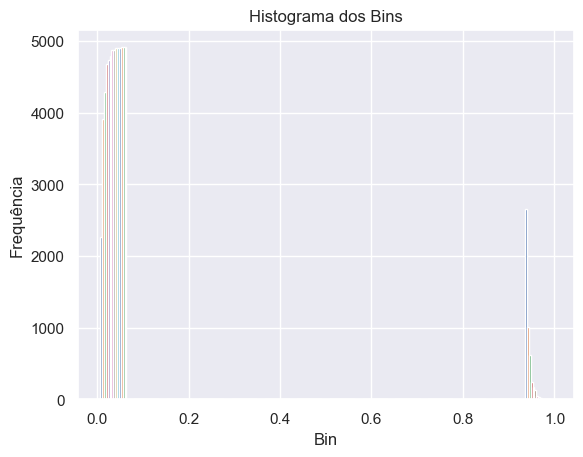

139066.00 - 2983911.75
2983911.75 - 6866211.91
6866211.91 - 12252934.51
12252934.51 - 18464831.15
18464831.15 - 25417395.44
25417395.44 - 34389550.85
34389550.85 - 47076139.34
47076139.34 - 62674180.04
62674180.04 - 97910537.38
97910537.38 - 128771723.03
128771723.03 - 138614964.27
138614964.27 - 152274526.67
152274526.67 - 161613366.00
161613366.00 - 163380671.00
Valores unicos energia_ativa_baixa_tensao_kwh: ['2983911.75 - 6866211.91', '6866211.91 - 12252934.51', '139066.00 - 2983911.75', '18464831.15 - 25417395.44', '12252934.51 - 18464831.15', ..., '128771723.03 - 138614964.27', '138614964.27 - 152274526.67', '161613366.00 - 163380671.00', '152274526.67 - 161613366.00', '62674180.04 - 97910537.38']
Length: 14
Categories (14, object): ['139066.00 - 2983911.75' < '2983911.75 - 6866211.91' < '6866211.91 - 12252934.51' < '12252934.51 - 18464831.15' ... '128771723.03 - 138614964.27' < '138614964.27 - 152274526.67' < '152274526.67 - 161613366.00' < '161613366.00 - 163380671.00']


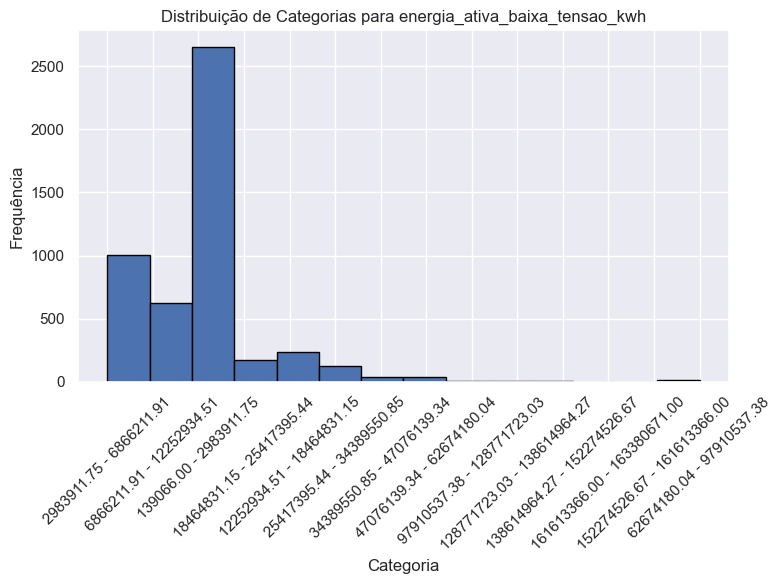

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4914 entries, 0 to 4913
Data columns (total 13 columns):
 #   Column                                     Non-Null Count  Dtype   
---  ------                                     --------------  -----   
 0   ano                                        4914 non-null   category
 1   mês                                        4914 non-null   category
 2   energia_ativa_baixa_tensao_kwh             4914 non-null   category
 3   energia_ativa_alta_tensao_kwh              4914 non-null   int64   
 4   cpes_domestico_baixa_tensao                4914 non-null   int64   
 5   cpes_domestico_alta_tensao                 4914 non-null   int64   
 6   cpes_iluminacao_publica_baixa_tensao       4914 non-null   int64   
 7   cpes_nao_domestico_baixa_tensao            4914 non-null   int64   
 8   cpes_nao_domestico_alta_tensao             4914 non-null   int64   
 9   cpes_outros_baixa_tensao                   4914 non-null   int64   
 10  cpes_outros_

In [6]:
# Parametros
coluna_energia_ativa_baixa = "energia_ativa_baixa_tensao_kwh"
energia_ativa_baixa = merged_df[coluna_energia_ativa_baixa]
num_bins = 14


# Criar um binning
discretizer = KBinsDiscretizer(n_bins=num_bins, strategy="kmeans", subsample=None)

# Ajustar o discretizador aos dados e transformá-los em bins
bins = discretizer.fit_transform(energia_ativa_baixa.values.reshape(-1, 1))

bins_dense = bins.toarray()

# Histograma dos bins
plt.hist(bins_dense, bins=num_bins)
plt.xlabel('Bin')
plt.ylabel('Frequência')
plt.title('Histograma dos Bins')
plt.show()

# Obter os limites dos intervalos dos bins
bin_edges = discretizer.bin_edges_[0]

# Criar uma lista de categorias com base nos limites dos intervalos
categorias = [f'{bin_edges[i]:.2f} - {bin_edges[i+1]:.2f}' for i in range(len(bin_edges)-1)]

# Imprimir as categorias
for categoria in categorias:
    print(categoria)

# Mapear os valores originais para os intervalos discretizados
merged_df[coluna_energia_ativa_baixa] = pd.cut(energia_ativa_baixa,
                                         bins=discretizer.bin_edges_[0],
                                         labels=categorias,
                                         include_lowest=True)

print(f"Valores unicos {coluna_energia_ativa_baixa}: {merged_df[coluna_energia_ativa_baixa].unique()}")

# Histograma da distribuição das categorias
plt.figure(figsize=(8, 6))
plt.hist(merged_df[coluna_energia_ativa_baixa], bins=num_bins, edgecolor='black')
plt.title(f'Distribuição de Categorias para {coluna_energia_ativa_baixa}')
plt.xlabel('Categoria')
plt.ylabel('Frequência')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

merged_df.info()

### Discretizar a variável energia ativa alta tensao kwh

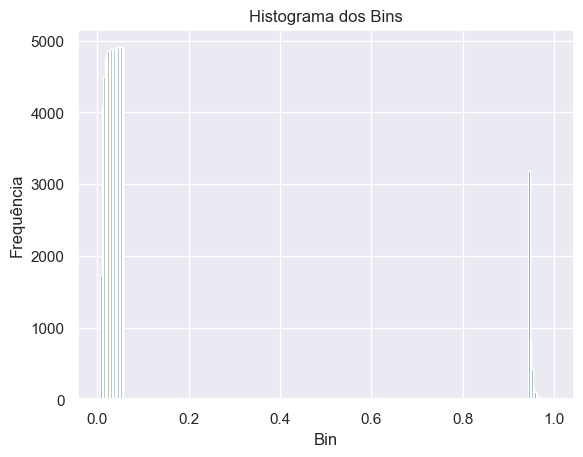

0.00 - 3353532.66
3353532.66 - 9317038.68
9317038.68 - 18336169.09
18336169.09 - 28225548.10
28225548.10 - 37597633.55
37597633.55 - 46732665.71
46732665.71 - 54151023.47
54151023.47 - 62644871.22
62644871.22 - 72220494.36
72220494.36 - 80429035.37
80429035.37 - 88237258.67
88237258.67 - 94821507.42
94821507.42 - 103652328.36
103652328.36 - 113154420.11
113154420.11 - 120239728.65
120239728.65 - 127947012.00
Valores unicos energia_ativa_alta_tensao_kwh: ['3353532.66 - 9317038.68', '0.00 - 3353532.66', '9317038.68 - 18336169.09', '18336169.09 - 28225548.10', '37597633.55 - 46732665.71', ..., '113154420.11 - 120239728.65', '103652328.36 - 113154420.11', '94821507.42 - 103652328.36', '80429035.37 - 88237258.67', '88237258.67 - 94821507.42']
Length: 16
Categories (16, object): ['0.00 - 3353532.66' < '3353532.66 - 9317038.68' < '9317038.68 - 18336169.09' < '18336169.09 - 28225548.10' ... '94821507.42 - 103652328.36' < '103652328.36 - 113154420.11' < '113154420.11 - 120239728.65' < '12023972

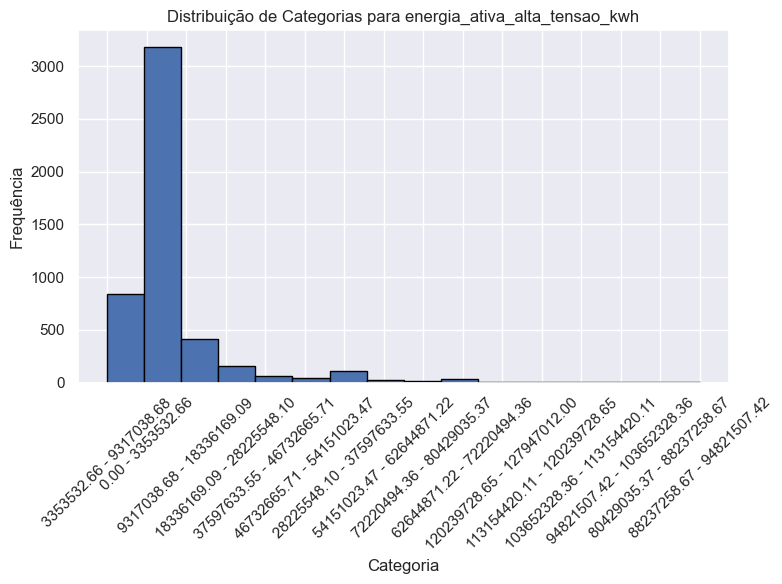

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4914 entries, 0 to 4913
Data columns (total 13 columns):
 #   Column                                     Non-Null Count  Dtype   
---  ------                                     --------------  -----   
 0   ano                                        4914 non-null   category
 1   mês                                        4914 non-null   category
 2   energia_ativa_baixa_tensao_kwh             4914 non-null   category
 3   energia_ativa_alta_tensao_kwh              4914 non-null   category
 4   cpes_domestico_baixa_tensao                4914 non-null   int64   
 5   cpes_domestico_alta_tensao                 4914 non-null   int64   
 6   cpes_iluminacao_publica_baixa_tensao       4914 non-null   int64   
 7   cpes_nao_domestico_baixa_tensao            4914 non-null   int64   
 8   cpes_nao_domestico_alta_tensao             4914 non-null   int64   
 9   cpes_outros_baixa_tensao                   4914 non-null   int64   
 10  cpes_outros_

In [7]:
# Parametros
coluna_energia_ativa_alta = "energia_ativa_alta_tensao_kwh"
energia_ativa_alta = merged_df[coluna_energia_ativa_alta]
num_bins = 16


# Criar um binning
discretizer = KBinsDiscretizer(n_bins=num_bins, strategy="kmeans", subsample=None)

# Ajustar o discretizador aos dados e transformá-los em bins
bins = discretizer.fit_transform(energia_ativa_alta.values.reshape(-1, 1))

bins_dense = bins.toarray()

# Histograma dos bins
plt.hist(bins_dense, bins=num_bins)
plt.xlabel('Bin')
plt.ylabel('Frequência')
plt.title('Histograma dos Bins')
plt.show()

# Obter os limites dos intervalos dos bins
bin_edges = discretizer.bin_edges_[0]

# Criar uma lista de categorias com base nos limites dos intervalos
categorias = [f'{bin_edges[i]:.2f} - {bin_edges[i+1]:.2f}' for i in range(len(bin_edges)-1)]

# Imprimir as categorias
for categoria in categorias:
    print(categoria)

# Mapear os valores originais para os intervalos discretizados
merged_df[coluna_energia_ativa_alta] = pd.cut(energia_ativa_alta,
                                         bins=discretizer.bin_edges_[0],
                                         labels=categorias,
                                         include_lowest=True)

print(f"Valores unicos {coluna_energia_ativa_alta}: {merged_df[coluna_energia_ativa_alta].unique()}")

# Histograma da distribuição das categorias
plt.figure(figsize=(8, 6))
plt.hist(merged_df[coluna_energia_ativa_alta], bins=num_bins, edgecolor='black')
plt.title(f'Distribuição de Categorias para {coluna_energia_ativa_alta}')
plt.xlabel('Categoria')
plt.ylabel('Frequência')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

merged_df.info()

### Discretizar CPEs domestico baixa tensao

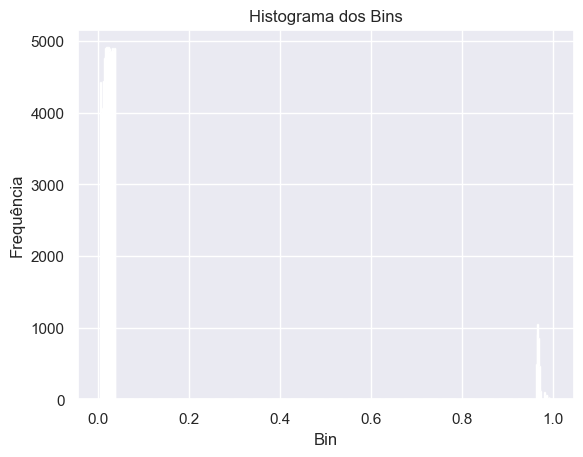

1042.00 - 3196.96
3196.96 - 5377.91
5377.91 - 8752.42
8752.42 - 14844.51
14844.51 - 22924.60
22924.60 - 32321.75
32321.75 - 40878.28
40878.28 - 47539.03
47539.03 - 51189.70
51189.70 - 51437.25
51437.25 - 51535.00
51535.00 - 51587.00
51587.00 - 55588.09
55588.09 - 63298.13
63298.13 - 71336.46
71336.46 - 77612.73
77612.73 - 83044.27
83044.27 - 91443.45
91443.45 - 101614.67
101614.67 - 122348.14
122348.14 - 155412.44
155412.44 - 240790.42
240790.42 - 309977.89
309977.89 - 312074.00
Valores unicos cpes_domestico_baixa_tensao: ['14844.51 - 22924.60', '3196.96 - 5377.91', '8752.42 - 14844.51', '40878.28 - 47539.03', '5377.91 - 8752.42', ..., '47539.03 - 51189.70', '51189.70 - 51437.25', '51437.25 - 51535.00', '51535.00 - 51587.00', '51587.00 - 55588.09']
Length: 24
Categories (24, object): ['1042.00 - 3196.96' < '3196.96 - 5377.91' < '5377.91 - 8752.42' < '8752.42 - 14844.51' ... '122348.14 - 155412.44' < '155412.44 - 240790.42' < '240790.42 - 309977.89' < '309977.89 - 312074.00']


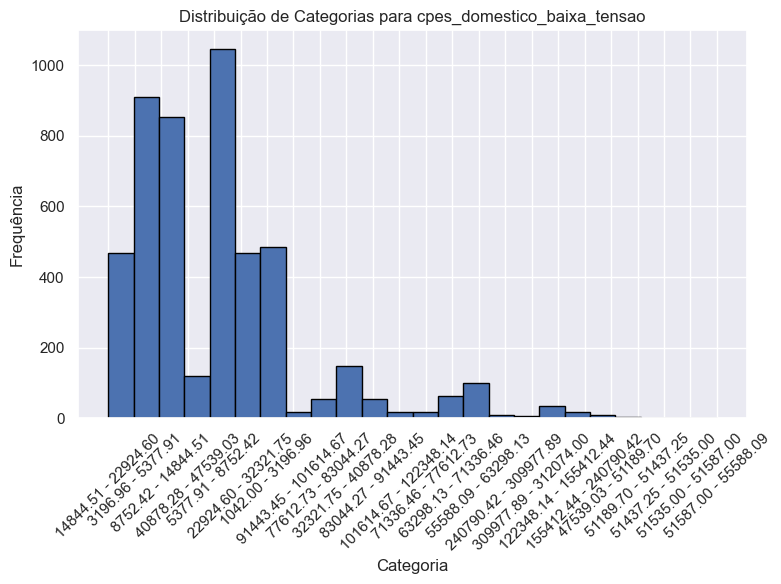

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4914 entries, 0 to 4913
Data columns (total 13 columns):
 #   Column                                     Non-Null Count  Dtype   
---  ------                                     --------------  -----   
 0   ano                                        4914 non-null   category
 1   mês                                        4914 non-null   category
 2   energia_ativa_baixa_tensao_kwh             4914 non-null   category
 3   energia_ativa_alta_tensao_kwh              4914 non-null   category
 4   cpes_domestico_baixa_tensao                4914 non-null   category
 5   cpes_domestico_alta_tensao                 4914 non-null   int64   
 6   cpes_iluminacao_publica_baixa_tensao       4914 non-null   int64   
 7   cpes_nao_domestico_baixa_tensao            4914 non-null   int64   
 8   cpes_nao_domestico_alta_tensao             4914 non-null   int64   
 9   cpes_outros_baixa_tensao                   4914 non-null   int64   
 10  cpes_outros_

In [8]:
# Parametros
coluna_cpes_dom_baixa = "cpes_domestico_baixa_tensao"
cpes_domestico_baixa_tensao = merged_df[coluna_cpes_dom_baixa]
num_bins = 24


# Criar um binning
discretizer = KBinsDiscretizer(n_bins=num_bins, strategy="kmeans", subsample=None)

# Ajustar o discretizador aos dados e transformá-los em bins
bins = discretizer.fit_transform(cpes_domestico_baixa_tensao.values.reshape(-1, 1))

bins_dense = bins.toarray()

# Histograma dos bins
plt.hist(bins_dense, bins=num_bins) 
plt.xlabel('Bin')
plt.ylabel('Frequência')
plt.title('Histograma dos Bins')
plt.show()

# Obter os limites dos intervalos dos bins
bin_edges = discretizer.bin_edges_[0]

# Criar uma lista de categorias com base nos limites dos intervalos
categorias = [f'{bin_edges[i]:.2f} - {bin_edges[i+1]:.2f}' for i in range(len(bin_edges)-1)]

# Imprimir as categorias
for categoria in categorias:
    print(categoria)

# Mapear os valores originais para os intervalos discretizados
merged_df[coluna_cpes_dom_baixa] = pd.cut(cpes_domestico_baixa_tensao,
                                         bins=discretizer.bin_edges_[0],
                                         labels=categorias,
                                         include_lowest=True)

print(f"Valores unicos {coluna_cpes_dom_baixa}: {merged_df[coluna_cpes_dom_baixa].unique()}")


# Histograma da distribuição das categorias
plt.figure(figsize=(8, 6))
plt.hist(merged_df[coluna_cpes_dom_baixa], bins=num_bins, edgecolor='black')
plt.title(f'Distribuição de Categorias para {coluna_cpes_dom_baixa}')
plt.xlabel('Categoria')
plt.ylabel('Frequência')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

merged_df.info()


### Discretizar CPEs domestico alta tensao

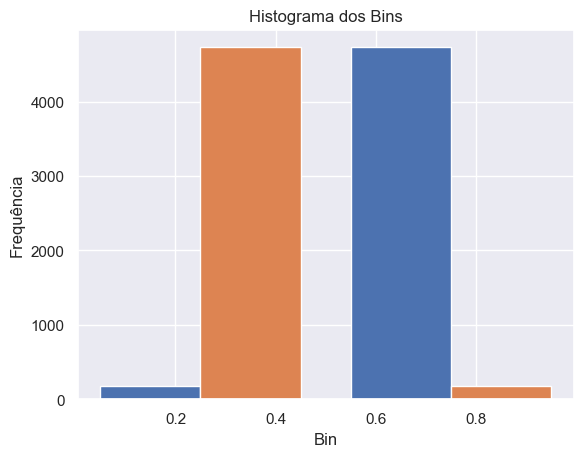

0.00 - 0.54
0.54 - 2.00
Valores unicos cpes_domestico_alta_tensao: ['0.00 - 0.54', '0.54 - 2.00']
Categories (2, object): ['0.00 - 0.54' < '0.54 - 2.00']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4914 entries, 0 to 4913
Data columns (total 13 columns):
 #   Column                                     Non-Null Count  Dtype   
---  ------                                     --------------  -----   
 0   ano                                        4914 non-null   category
 1   mês                                        4914 non-null   category
 2   energia_ativa_baixa_tensao_kwh             4914 non-null   category
 3   energia_ativa_alta_tensao_kwh              4914 non-null   category
 4   cpes_domestico_baixa_tensao                4914 non-null   category
 5   cpes_domestico_alta_tensao                 4914 non-null   category
 6   cpes_iluminacao_publica_baixa_tensao       4914 non-null   int64   
 7   cpes_nao_domestico_baixa_tensao            4914 non-null   int64   
 8   cpes

In [9]:
# Parametros
coluna_cpes_dom_alta = "cpes_domestico_alta_tensao"
cpes_domestico_alta_tensao = merged_df[coluna_cpes_dom_alta]
num_bins = 2


# Criar um binning
discretizer = KBinsDiscretizer(n_bins=num_bins, strategy="kmeans", subsample=None)

# Ajustar o discretizador aos dados e transformá-los em bins
bins = discretizer.fit_transform(cpes_domestico_alta_tensao.values.reshape(-1, 1))

bins_dense = bins.toarray()

# Histograma dos bins
plt.hist(bins_dense, bins=num_bins)
plt.xlabel('Bin')
plt.ylabel('Frequência')
plt.title('Histograma dos Bins')
plt.show()

# Obter os limites dos intervalos dos bins
bin_edges = discretizer.bin_edges_[0]

# Criar uma lista de categorias com base nos limites dos intervalos
categorias = [f'{bin_edges[i]:.2f} - {bin_edges[i+1]:.2f}' for i in range(len(bin_edges)-1)]

# Imprimir as categorias
for categoria in categorias:
    print(categoria)

# Mapear os valores originais para os intervalos discretizados
merged_df[coluna_cpes_dom_alta] = pd.cut(cpes_domestico_alta_tensao,
                                         bins=discretizer.bin_edges_[0],
                                         labels=categorias,
                                         include_lowest=True)

print(f"Valores unicos {coluna_cpes_dom_alta}: {merged_df[coluna_cpes_dom_alta].unique()}")

# Histograma da distribuição das categorias
plt.figure(figsize=(8, 6))
plt.hist(merged_df[coluna_cpes_dom_alta], bins=num_bins, edgecolor='black')
plt.title(f'Distribuição de Categorias para {coluna_cpes_dom_alta}')
plt.xlabel('Categoria')
plt.ylabel('Frequência')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

merged_df.info()


### Discretizar CPEs Iluminação Publica Baixa Tensão

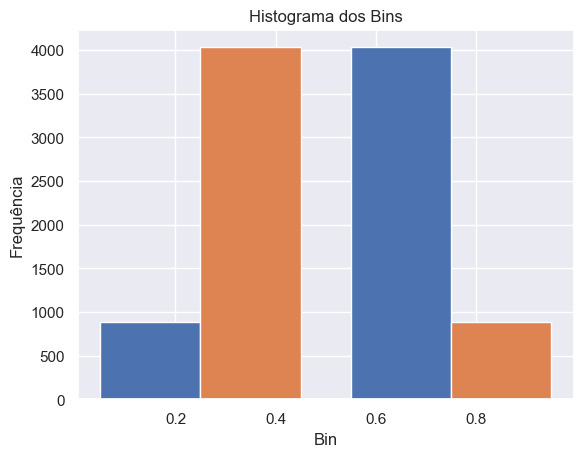

7.00 - 348.99
348.99 - 1185.00
Valores unicos cpes_iluminacao_publica_baixa_tensao: ['7.00 - 348.99', '348.99 - 1185.00']
Categories (2, object): ['7.00 - 348.99' < '348.99 - 1185.00']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4914 entries, 0 to 4913
Data columns (total 13 columns):
 #   Column                                     Non-Null Count  Dtype   
---  ------                                     --------------  -----   
 0   ano                                        4914 non-null   category
 1   mês                                        4914 non-null   category
 2   energia_ativa_baixa_tensao_kwh             4914 non-null   category
 3   energia_ativa_alta_tensao_kwh              4914 non-null   category
 4   cpes_domestico_baixa_tensao                4914 non-null   category
 5   cpes_domestico_alta_tensao                 4914 non-null   category
 6   cpes_iluminacao_publica_baixa_tensao       4914 non-null   category
 7   cpes_nao_domestico_baixa_tensao            491

In [10]:
# Parametros
coluna_cpes_ilumpub_baixa = "cpes_iluminacao_publica_baixa_tensao"
cpes_iluminacao_publica_baixa_tensao = merged_df[coluna_cpes_ilumpub_baixa]
num_bins = 2


# Criar um binning
discretizer = KBinsDiscretizer(n_bins=num_bins, strategy="kmeans", subsample=None)

# Ajustar o discretizador aos dados e transformá-los em bins
bins = discretizer.fit_transform(cpes_iluminacao_publica_baixa_tensao.values.reshape(-1, 1))

bins_dense = bins.toarray()

# Histograma dos bins
plt.hist(bins_dense, bins=num_bins)
plt.xlabel('Bin')
plt.ylabel('Frequência')
plt.title('Histograma dos Bins')
plt.show()

# Obter os limites dos intervalos dos bins
bin_edges = discretizer.bin_edges_[0]

# Criar uma lista de categorias com base nos limites dos intervalos
categorias = [f'{bin_edges[i]:.2f} - {bin_edges[i+1]:.2f}' for i in range(len(bin_edges)-1)]

# Imprimir as categorias
for categoria in categorias:
    print(categoria)

# Mapear os valores originais para os intervalos discretizados
merged_df[coluna_cpes_ilumpub_baixa] = pd.cut(cpes_iluminacao_publica_baixa_tensao,
                                         bins=discretizer.bin_edges_[0],
                                         labels=categorias,
                                         include_lowest=True)

print(f"Valores unicos {coluna_cpes_ilumpub_baixa}: {merged_df[coluna_cpes_ilumpub_baixa].unique()}")

# Histograma da distribuição das categorias
plt.figure(figsize=(8, 6))
plt.hist(merged_df[coluna_cpes_ilumpub_baixa], bins=num_bins, edgecolor='black')
plt.title(f'Distribuição de Categorias para {coluna_cpes_ilumpub_baixa}')
plt.xlabel('Categoria')
plt.ylabel('Frequência')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

merged_df.info()


### Discretizar CPEs Não Domestico Baixa Tensão

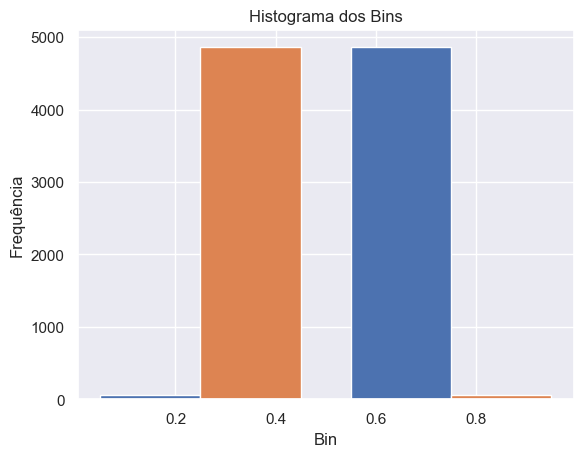

174.00 - 27548.14
27548.14 - 79984.00
Valores unicos cpes_nao_domestico_baixa_tensao: ['174.00 - 27548.14', '27548.14 - 79984.00']
Categories (2, object): ['174.00 - 27548.14' < '27548.14 - 79984.00']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4914 entries, 0 to 4913
Data columns (total 13 columns):
 #   Column                                     Non-Null Count  Dtype   
---  ------                                     --------------  -----   
 0   ano                                        4914 non-null   category
 1   mês                                        4914 non-null   category
 2   energia_ativa_baixa_tensao_kwh             4914 non-null   category
 3   energia_ativa_alta_tensao_kwh              4914 non-null   category
 4   cpes_domestico_baixa_tensao                4914 non-null   category
 5   cpes_domestico_alta_tensao                 4914 non-null   category
 6   cpes_iluminacao_publica_baixa_tensao       4914 non-null   category
 7   cpes_nao_domestico_baixa_tensa

In [11]:
# Parametros
coluna_cpes_nao_dom_baixa = "cpes_nao_domestico_baixa_tensao"
cpes_nao_domestico_baixa_tensao = merged_df[coluna_cpes_nao_dom_baixa]
num_bins = 2


# Criar um binning
discretizer = KBinsDiscretizer(n_bins=num_bins, strategy="kmeans", subsample=None)

# Ajustar o discretizador aos dados e transformá-los em bins
bins = discretizer.fit_transform(cpes_nao_domestico_baixa_tensao.values.reshape(-1, 1))

bins_dense = bins.toarray()

# Histograma dos bins
plt.hist(bins_dense, bins=num_bins)
plt.xlabel('Bin')
plt.ylabel('Frequência')
plt.title('Histograma dos Bins')
plt.show()

# Obter os limites dos intervalos dos bins
bin_edges = discretizer.bin_edges_[0]

# Criar uma lista de categorias com base nos limites dos intervalos
categorias = [f'{bin_edges[i]:.2f} - {bin_edges[i+1]:.2f}' for i in range(len(bin_edges)-1)]

# Imprimir as categorias
for categoria in categorias:
    print(categoria)

# Mapear os valores originais para os intervalos discretizados
merged_df[coluna_cpes_nao_dom_baixa] = pd.cut(cpes_nao_domestico_baixa_tensao,
                                         bins=discretizer.bin_edges_[0],
                                         labels=categorias,
                                         include_lowest=True)

print(f"Valores unicos {coluna_cpes_nao_dom_baixa}: {merged_df[coluna_cpes_nao_dom_baixa].unique()}")

# Histograma da distribuição das categorias
plt.figure(figsize=(8, 6))
plt.hist(merged_df[coluna_cpes_nao_dom_baixa], bins=num_bins, edgecolor='black')
plt.title(f'Distribuição de Categorias para {coluna_cpes_nao_dom_baixa}')
plt.xlabel('Categoria')
plt.ylabel('Frequência')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

merged_df.info()

### Discretizar CPEs Não Domestico Alta Tensão

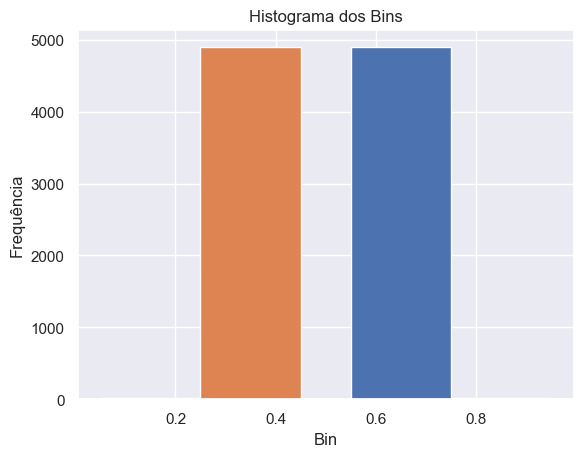

0.00 - 651.22
651.22 - 1226.00
Valores unicos cpes_nao_domestico_alta_tensao: ['0.00 - 651.22', '651.22 - 1226.00']
Categories (2, object): ['0.00 - 651.22' < '651.22 - 1226.00']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4914 entries, 0 to 4913
Data columns (total 13 columns):
 #   Column                                     Non-Null Count  Dtype   
---  ------                                     --------------  -----   
 0   ano                                        4914 non-null   category
 1   mês                                        4914 non-null   category
 2   energia_ativa_baixa_tensao_kwh             4914 non-null   category
 3   energia_ativa_alta_tensao_kwh              4914 non-null   category
 4   cpes_domestico_baixa_tensao                4914 non-null   category
 5   cpes_domestico_alta_tensao                 4914 non-null   category
 6   cpes_iluminacao_publica_baixa_tensao       4914 non-null   category
 7   cpes_nao_domestico_baixa_tensao            4914 non-

In [12]:
# Parametros
coluna_cpes_nao_dom_alta = "cpes_nao_domestico_alta_tensao"
cpes_nao_domestico_alta_tensao = merged_df[coluna_cpes_nao_dom_alta]
num_bins = 2


# Criar um binning
discretizer = KBinsDiscretizer(n_bins=num_bins, strategy="kmeans", subsample=None)

# Ajustar o discretizador aos dados e transformá-los em bins
bins = discretizer.fit_transform(cpes_nao_domestico_alta_tensao.values.reshape(-1, 1))

bins_dense = bins.toarray()

# Histograma dos bins
plt.hist(bins_dense, bins=num_bins)
plt.xlabel('Bin')
plt.ylabel('Frequência')
plt.title('Histograma dos Bins')
plt.show()

# Obter os limites dos intervalos dos bins
bin_edges = discretizer.bin_edges_[0]

# Criar uma lista de categorias com base nos limites dos intervalos
categorias = [f'{bin_edges[i]:.2f} - {bin_edges[i+1]:.2f}' for i in range(len(bin_edges)-1)]

# Imprimir as categorias
for categoria in categorias:
    print(categoria)

# Mapear os valores originais para os intervalos discretizados
merged_df[coluna_cpes_nao_dom_alta] = pd.cut(cpes_nao_domestico_alta_tensao,
                                         bins=discretizer.bin_edges_[0],
                                         labels=categorias,
                                         include_lowest=True)

print(f"Valores unicos {coluna_cpes_nao_dom_alta}: {merged_df[coluna_cpes_nao_dom_alta].unique()}")

# Histograma da distribuição das categorias
plt.figure(figsize=(8, 6))
plt.hist(merged_df[coluna_cpes_nao_dom_alta], bins=num_bins, edgecolor='black')
plt.title(f'Distribuição de Categorias para {coluna_cpes_nao_dom_alta}')
plt.xlabel('Categoria')
plt.ylabel('Frequência')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

merged_df.info()

### Discretizar CPEs Outros Baixa Tensão

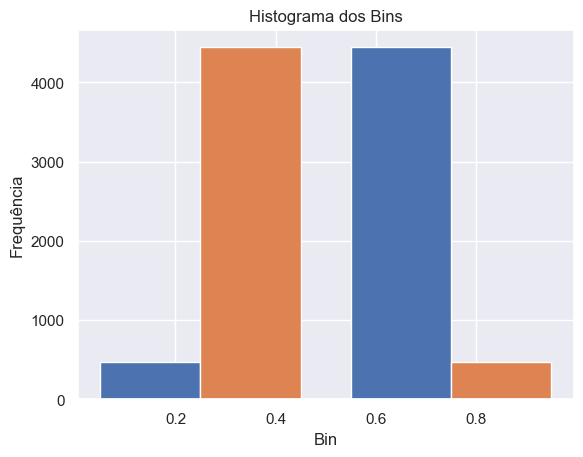

1.00 - 346.87
346.87 - 2186.00
Valores unicos cpes_outros_baixa_tensao: ['1.00 - 346.87', '346.87 - 2186.00']
Categories (2, object): ['1.00 - 346.87' < '346.87 - 2186.00']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4914 entries, 0 to 4913
Data columns (total 13 columns):
 #   Column                                     Non-Null Count  Dtype   
---  ------                                     --------------  -----   
 0   ano                                        4914 non-null   category
 1   mês                                        4914 non-null   category
 2   energia_ativa_baixa_tensao_kwh             4914 non-null   category
 3   energia_ativa_alta_tensao_kwh              4914 non-null   category
 4   cpes_domestico_baixa_tensao                4914 non-null   category
 5   cpes_domestico_alta_tensao                 4914 non-null   category
 6   cpes_iluminacao_publica_baixa_tensao       4914 non-null   category
 7   cpes_nao_domestico_baixa_tensao            4914 non-null  

In [13]:
# Parametros
coluna_cpes_outros_baixa = "cpes_outros_baixa_tensao"
cpes_outros_baixa_tensao = merged_df[coluna_cpes_outros_baixa]
num_bins = 2


# Criar um binning
discretizer = KBinsDiscretizer(n_bins=num_bins, strategy="kmeans", subsample=None)

# Ajustar o discretizador aos dados e transformá-los em bins
bins = discretizer.fit_transform(cpes_outros_baixa_tensao.values.reshape(-1, 1))

bins_dense = bins.toarray()

# Histograma dos bins
plt.hist(bins_dense, bins=num_bins)
plt.xlabel('Bin')
plt.ylabel('Frequência')
plt.title('Histograma dos Bins')
plt.show()

# Obter os limites dos intervalos dos bins
bin_edges = discretizer.bin_edges_[0]

# Criar uma lista de categorias com base nos limites dos intervalos
categorias = [f'{bin_edges[i]:.2f} - {bin_edges[i+1]:.2f}' for i in range(len(bin_edges)-1)]

# Imprimir as categorias
for categoria in categorias:
    print(categoria)

# Mapear os valores originais para os intervalos discretizados
merged_df[coluna_cpes_outros_baixa] = pd.cut(cpes_outros_baixa_tensao,
                                         bins=discretizer.bin_edges_[0],
                                         labels=categorias,
                                         include_lowest=True)

print(f"Valores unicos {coluna_cpes_outros_baixa}: {merged_df[coluna_cpes_outros_baixa].unique()}")

# Histograma da distribuição das categorias
plt.figure(figsize=(8, 6))
plt.hist(merged_df[coluna_cpes_outros_baixa], bins=num_bins, edgecolor='black')
plt.title(f'Distribuição de Categorias para {coluna_cpes_outros_baixa}')
plt.xlabel('Categoria')
plt.ylabel('Frequência')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

merged_df.info()

### Discretizar CPEs Outros Alta Tensão

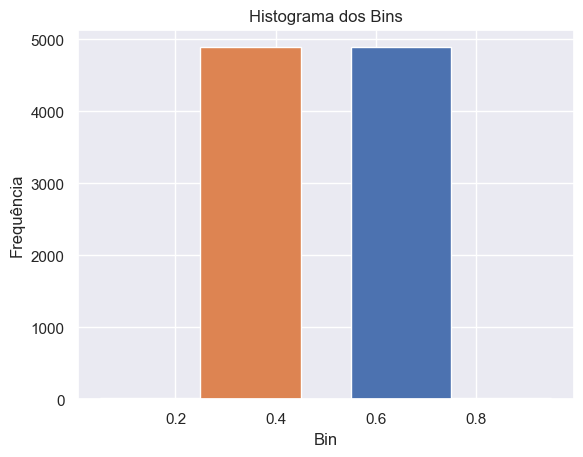

0.00 - 27.46
27.46 - 75.00
Valores unicos cpes_outros_alta_tensao: ['0.00 - 27.46', '27.46 - 75.00']
Categories (2, object): ['0.00 - 27.46' < '27.46 - 75.00']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4914 entries, 0 to 4913
Data columns (total 13 columns):
 #   Column                                     Non-Null Count  Dtype   
---  ------                                     --------------  -----   
 0   ano                                        4914 non-null   category
 1   mês                                        4914 non-null   category
 2   energia_ativa_baixa_tensao_kwh             4914 non-null   category
 3   energia_ativa_alta_tensao_kwh              4914 non-null   category
 4   cpes_domestico_baixa_tensao                4914 non-null   category
 5   cpes_domestico_alta_tensao                 4914 non-null   category
 6   cpes_iluminacao_publica_baixa_tensao       4914 non-null   category
 7   cpes_nao_domestico_baixa_tensao            4914 non-null   category
 8 

In [14]:
# Parametros
coluna_cpes_outros_alta = "cpes_outros_alta_tensao"
cpes_outros_alta_tensao = merged_df[coluna_cpes_outros_alta]
num_bins = 2


# Criar um binning
discretizer = KBinsDiscretizer(n_bins=num_bins, strategy="kmeans", subsample=None)

# Ajustar o discretizador aos dados e transformá-los em bins
bins = discretizer.fit_transform(cpes_outros_alta_tensao.values.reshape(-1, 1))

bins_dense = bins.toarray()

# Histograma dos bins
plt.hist(bins_dense, bins=num_bins)
plt.xlabel('Bin')
plt.ylabel('Frequência')
plt.title('Histograma dos Bins')
plt.show()

# Obter os limites dos intervalos dos bins
bin_edges = discretizer.bin_edges_[0]

# Criar uma lista de categorias com base nos limites dos intervalos
categorias = [f'{bin_edges[i]:.2f} - {bin_edges[i+1]:.2f}' for i in range(len(bin_edges)-1)]

# Imprimir as categorias
for categoria in categorias:
    print(categoria)

# Mapear os valores originais para os intervalos discretizados
merged_df[coluna_cpes_outros_alta] = pd.cut(cpes_outros_alta_tensao,
                                         bins=discretizer.bin_edges_[0],
                                         labels=categorias,
                                         include_lowest=True)

print(f"Valores unicos {coluna_cpes_outros_alta}: {merged_df[coluna_cpes_outros_alta].unique()}")

# Histograma da distribuição das categorias
plt.figure(figsize=(8, 6))
plt.hist(merged_df[coluna_cpes_outros_alta], bins=num_bins, edgecolor='black')
plt.title(f'Distribuição de Categorias para {coluna_cpes_outros_alta}')
plt.xlabel('Categoria')
plt.ylabel('Frequência')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

merged_df.info()

### Discretizar CPEs Mobilidade Eletrica Não Baixa Tensão

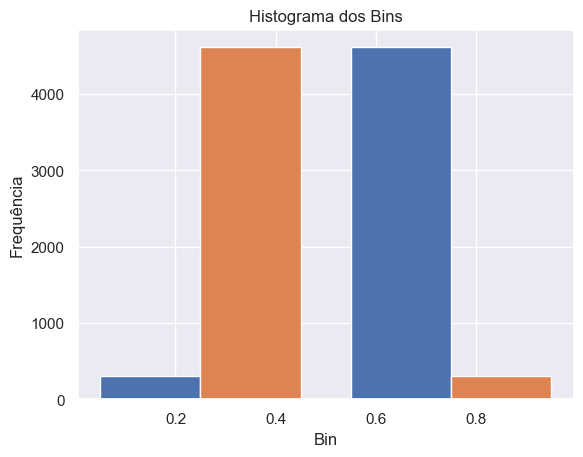

1144.00 - 91652.74
91652.74 - 528158.00
Valores unicos cpes_mobilidade_eletrica_nao_baixa_tensao: ['1144.00 - 91652.74', '91652.74 - 528158.00']
Categories (2, object): ['1144.00 - 91652.74' < '91652.74 - 528158.00']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4914 entries, 0 to 4913
Data columns (total 13 columns):
 #   Column                                     Non-Null Count  Dtype   
---  ------                                     --------------  -----   
 0   ano                                        4914 non-null   category
 1   mês                                        4914 non-null   category
 2   energia_ativa_baixa_tensao_kwh             4914 non-null   category
 3   energia_ativa_alta_tensao_kwh              4914 non-null   category
 4   cpes_domestico_baixa_tensao                4914 non-null   category
 5   cpes_domestico_alta_tensao                 4914 non-null   category
 6   cpes_iluminacao_publica_baixa_tensao       4914 non-null   category
 7   cpes_nao_domes

In [15]:
# Parametros
coluna_cpes_mob_elet_nao_baixa = "cpes_mobilidade_eletrica_nao_baixa_tensao"
cpes_mobilidade_eletrica_nao_baixa_tensao = merged_df[coluna_cpes_mob_elet_nao_baixa]
num_bins = 2


# Criar um binning
discretizer = KBinsDiscretizer(n_bins=num_bins, strategy="kmeans", subsample=None)

# Ajustar o discretizador aos dados e transformá-los em bins
bins = discretizer.fit_transform(cpes_mobilidade_eletrica_nao_baixa_tensao.values.reshape(-1, 1))

bins_dense = bins.toarray()

# Histograma dos bins
plt.hist(bins_dense, bins=num_bins)
plt.xlabel('Bin')
plt.ylabel('Frequência')
plt.title('Histograma dos Bins')
plt.show()

# Obter os limites dos intervalos dos bins
bin_edges = discretizer.bin_edges_[0]

# Criar uma lista de categorias com base nos limites dos intervalos
categorias = [f'{bin_edges[i]:.2f} - {bin_edges[i+1]:.2f}' for i in range(len(bin_edges)-1)]

# Imprimir as categorias
for categoria in categorias:
    print(categoria)

# Mapear os valores originais para os intervalos discretizados
merged_df[coluna_cpes_mob_elet_nao_baixa] = pd.cut(cpes_mobilidade_eletrica_nao_baixa_tensao,
                                         bins=discretizer.bin_edges_[0],
                                         labels=categorias,
                                         include_lowest=True)

print(f"Valores unicos {coluna_cpes_mob_elet_nao_baixa}: {merged_df[coluna_cpes_mob_elet_nao_baixa].unique()}")

# Histograma da distribuição das categorias
plt.figure(figsize=(8, 6))
plt.hist(merged_df[coluna_cpes_mob_elet_nao_baixa], bins=num_bins, edgecolor='black')
plt.title(f'Distribuição de Categorias para {coluna_cpes_mob_elet_nao_baixa}')
plt.xlabel('Categoria')
plt.ylabel('Frequência')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

merged_df.info()

### Discretizar CPEs Mobilidade Eletrica Sim Baixa Tensão

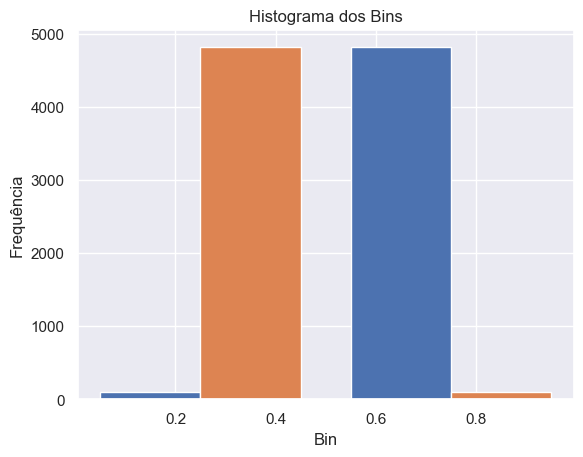

0.00 - 76.95
76.95 - 382.00
Valores unicos cpes_mobilidade_eletrica_sim_baixa_tensao: ['0.00 - 76.95', '76.95 - 382.00']
Categories (2, object): ['0.00 - 76.95' < '76.95 - 382.00']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4914 entries, 0 to 4913
Data columns (total 13 columns):
 #   Column                                     Non-Null Count  Dtype   
---  ------                                     --------------  -----   
 0   ano                                        4914 non-null   category
 1   mês                                        4914 non-null   category
 2   energia_ativa_baixa_tensao_kwh             4914 non-null   category
 3   energia_ativa_alta_tensao_kwh              4914 non-null   category
 4   cpes_domestico_baixa_tensao                4914 non-null   category
 5   cpes_domestico_alta_tensao                 4914 non-null   category
 6   cpes_iluminacao_publica_baixa_tensao       4914 non-null   category
 7   cpes_nao_domestico_baixa_tensao            4914 no

In [16]:
# Parametros
coluna_cpes_mob_elet_sim_baixa = "cpes_mobilidade_eletrica_sim_baixa_tensao"
cpes_mobilidade_eletrica_sim_baixa_tensao = merged_df[coluna_cpes_mob_elet_sim_baixa]
num_bins = 2


# Criar um binning
discretizer = KBinsDiscretizer(n_bins=num_bins, strategy="kmeans", subsample=None)

# Ajustar o discretizador aos dados e transformá-los em bins
bins = discretizer.fit_transform(cpes_mobilidade_eletrica_sim_baixa_tensao.values.reshape(-1, 1))

bins_dense = bins.toarray()

# Histograma dos bins
plt.hist(bins_dense, bins=num_bins)
plt.xlabel('Bin')
plt.ylabel('Frequência')
plt.title('Histograma dos Bins')
plt.show()

# Obter os limites dos intervalos dos bins
bin_edges = discretizer.bin_edges_[0]

# Criar uma lista de categorias com base nos limites dos intervalos
categorias = [f'{bin_edges[i]:.2f} - {bin_edges[i+1]:.2f}' for i in range(len(bin_edges)-1)]

# Imprimir as categorias
for categoria in categorias:
    print(categoria)

# Mapear os valores originais para os intervalos discretizados
merged_df[coluna_cpes_mob_elet_sim_baixa] = pd.cut(cpes_mobilidade_eletrica_sim_baixa_tensao,
                                         bins=discretizer.bin_edges_[0],
                                         labels=categorias,
                                         include_lowest=True)

print(f"Valores unicos {coluna_cpes_mob_elet_sim_baixa}: {merged_df[coluna_cpes_mob_elet_sim_baixa].unique()}")

# Histograma da distribuição das categorias
plt.figure(figsize=(8, 6))
plt.hist(merged_df[coluna_cpes_mob_elet_sim_baixa], bins=num_bins, edgecolor='black')
plt.title(f'Distribuição de Categorias para {coluna_cpes_mob_elet_sim_baixa}')
plt.xlabel('Categoria')
plt.ylabel('Frequência')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

merged_df.info()